In [46]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
#import data
df = pd.read_csv('TLKM.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,3470.0,3550.0,3440.0,3440.0,3116.205811,96802900
1,2020-03-03,3510.0,3660.0,3470.0,3620.0,3279.262939,114698200
2,2020-03-04,3640.0,3840.0,3630.0,3830.0,3469.496582,136081000
3,2020-03-05,3820.0,3880.0,3760.0,3830.0,3469.496582,101235000
4,2020-03-06,3730.0,3790.0,3710.0,3750.0,3397.026611,86476000
...,...,...,...,...,...,...,...
408,2021-11-08,3780.0,3780.0,3710.0,3750.0,3750.000000,58758600
409,2021-11-09,3730.0,3740.0,3680.0,3710.0,3710.000000,92427800
410,2021-11-10,3670.0,3720.0,3670.0,3700.0,3700.000000,53511200
411,2021-11-11,3700.0,3730.0,3640.0,3650.0,3650.000000,95789600


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       413 non-null    object 
 1   Open       413 non-null    float64
 2   High       413 non-null    float64
 3   Low        413 non-null    float64
 4   Close      413 non-null    float64
 5   Adj Close  413 non-null    float64
 6   Volume     413 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 22.7+ KB


In [49]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,3241.307506,3286.246973,3194.116223,3237.142857,3097.506067,1.280827e+08
std,269.673904,268.737984,273.407136,274.282951,314.664342,7.767769e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2373.389404,0.000000e+00
25%,3100.000000,3130.000000,3050.000000,3080.000000,2875.031494,7.730690e+07
50%,3260.000000,3300.000000,3200.000000,3250.000000,3103.510742,1.089886e+08
75%,3400.000000,3440.000000,3360.000000,3400.000000,3303.430176,1.597765e+08
max,3860.000000,3880.000000,3820.000000,3870.000000,3870.000000,6.241426e+08


In [50]:
df1 = df.drop('Volume', axis=1)
df1

,Date,Open,High,Low,Close,Adj Close
0,2020-03-02,3470.0,3550.0,3440.0,3440.0,3116.205811
1,2020-03-03,3510.0,3660.0,3470.0,3620.0,3279.262939
2,2020-03-04,3640.0,3840.0,3630.0,3830.0,3469.496582
3,2020-03-05,3820.0,3880.0,3760.0,3830.0,3469.496582
4,2020-03-06,3730.0,3790.0,3710.0,3750.0,3397.026611
...,...,...,...,...,...,...
408,2021-11-08,3780.0,3780.0,3710.0,3750.0,3750.000000
409,2021-11-09,3730.0,3740.0,3680.0,3710.0,3710.000000
410,2021-11-10,3670.0,3720.0,3670.0,3700.0,3700.000000
411,2021-11-11,3700.0,3730.0,3640.0,3650.0,3650.000000


Text(0.5, 1.0, 'General Statistic of Saham PT Telekomunikasi Indonesia')

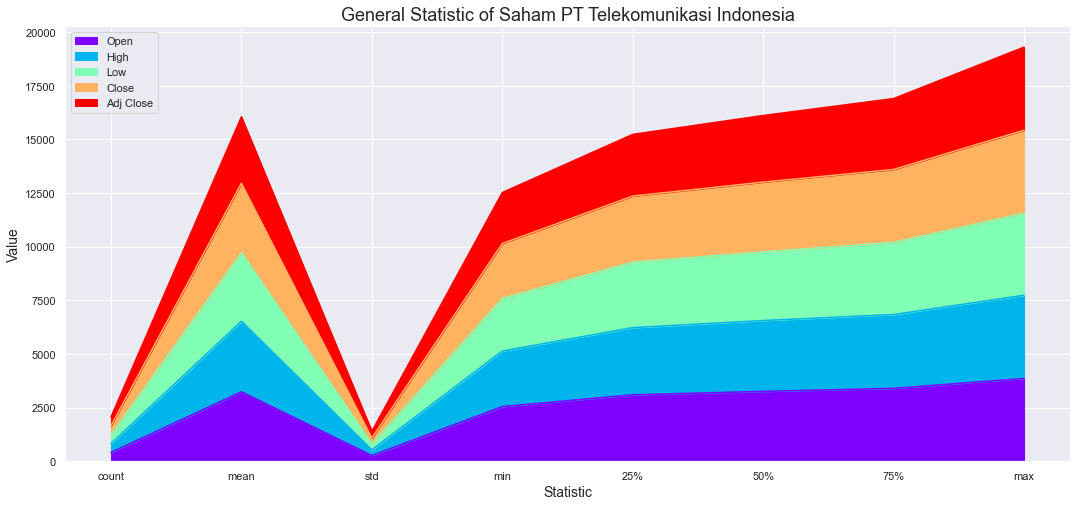

In [51]:
#melakukan visualisasi dari data describe

df1.describe().plot(kind='area', figsize = (18,8), colormap='rainbow')
plt.xlabel('Statistic', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title("General Statistic of Saham PT Telekomunikasi Indonesia", fontsize=18)

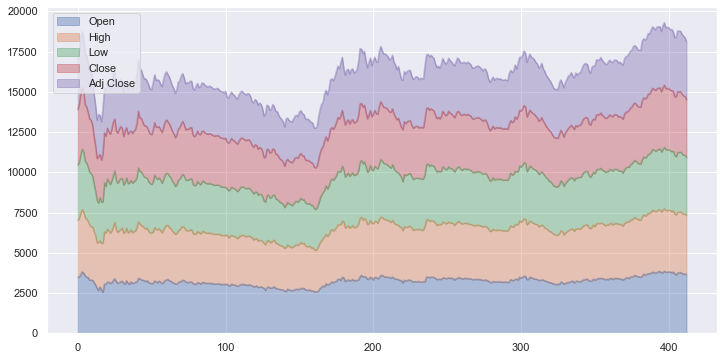

In [52]:
#visualisasi area plot

df1.plot.area(y=['Open','High','Low','Close','Adj Close'], alpha=0.4, figsize=(12,6));

In [53]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [54]:
#Korelasi dengan heatmap
korelasi = df.corr()
korelasi1 = korelasi.index

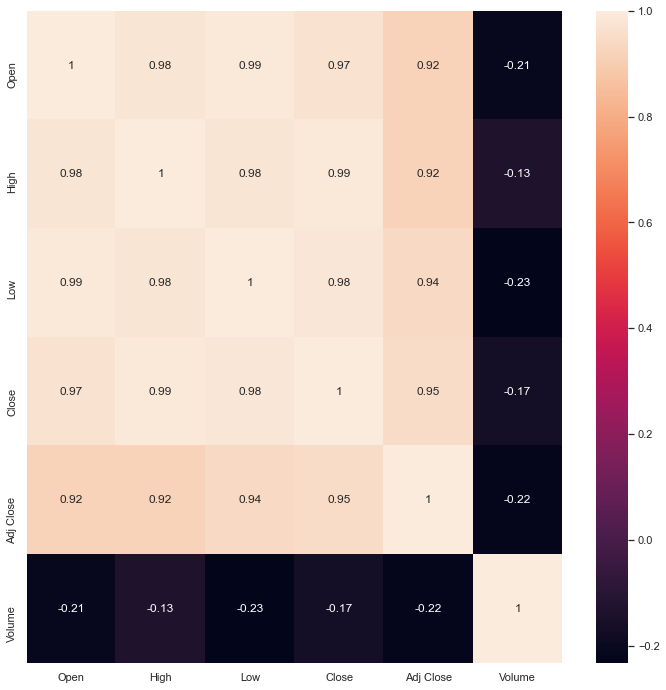

In [55]:
plt.figure(figsize=(12,12))
g=sns.heatmap(df[korelasi1].corr(),annot=True)

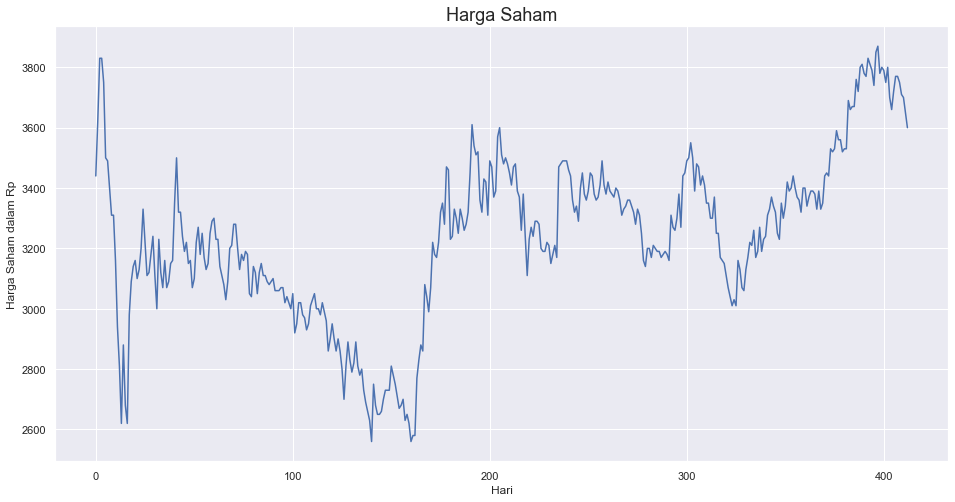

In [56]:
#Plot time series dari harga saham -- diambil harga penutupan (Close)
plt.figure(figsize=(16,8))
plt.title('Harga Saham', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.show()

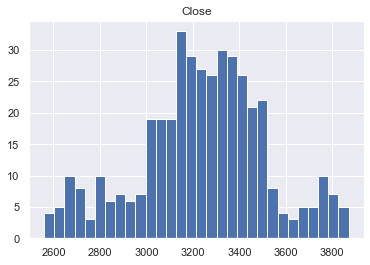

In [57]:
df.hist(column='Close', bins=30)
plt.show()

<AxesSubplot:ylabel='Close'>

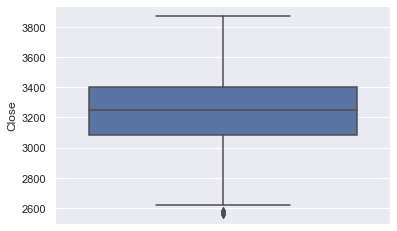

In [58]:
sns.boxplot(y='Close', data=df)

# Forecasting dengan LSTM

In [59]:
from numpy import array
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Input

In [60]:
#akan diprediksi harga saham penutupan (Close)
df_p=df.filter(['Close'])

In [61]:
#Mengaplikasikan MinMaxScaler untuk mengubah data di rentang 0 dan 1
#diubah dalam bentuk array dengan library numpy
scaler = MinMaxScaler(feature_range=(0,1))
df_s = scaler.fit_transform(np.array(df_p).reshape(-1,1))
df_s

array([[0.67175573],
       [0.80916031],
       [0.96946565],
       [0.96946565],
       [0.90839695],
       [0.71755725],
       [0.70992366],
       [0.64122137],
       [0.57251908],
       [0.57251908],
       [0.45801527],
       [0.29007634],
       [0.19083969],
       [0.04580153],
       [0.24427481],
       [0.09160305],
       [0.04580153],
       [0.32061069],
       [0.40458015],
       [0.44274809],
       [0.45801527],
       [0.41221374],
       [0.4351145 ],
       [0.48854962],
       [0.58778626],
       [0.50381679],
       [0.41984733],
       [0.42748092],
       [0.47328244],
       [0.51908397],
       [0.41984733],
       [0.33587786],
       [0.51145038],
       [0.42748092],
       [0.38931298],
       [0.45801527],
       [0.38931298],
       [0.40458015],
       [0.45038168],
       [0.45801527],
       [0.60305344],
       [0.71755725],
       [0.58015267],
       [0.58015267],
       [0.51908397],
       [0.48091603],
       [0.50381679],
       [0.450

In [62]:
#splitting data menjadi data train dan data test
training_size = int(len(df_s)*0.75) 
test_size = len(df_s) - training_size 

In [63]:
training_size, test_size

(309, 104)

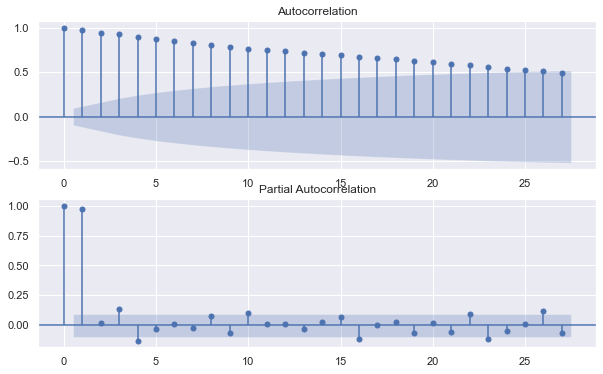

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0]=plot_acf(df.iloc[:,5],ax=ax[0])
ax[1]=plot_pacf(df.iloc[:,5],ax=ax[1])

In [65]:
#Mengubah array menjadi data matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [66]:
time_step=4 #dilihat 5 lag terakhir yang keluar
X_train, Y_train = create_dataset(df_s[:training_size,:], time_step)
X_test, Y_test = create_dataset(df_s[training_size-time_step:,:], time_step)

In [67]:
print(X_train.shape), print(Y_train.shape)

(305, 4)
(305,)


(None, None)

In [68]:
#reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
model = Sequential()
model.add(LSTM(145, return_sequences=False, input_shape=(time_step,1)))
model.add(Dense(65,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 145)               85260     
                                                                 
 dense_2 (Dense)             (None, 65)                9490      
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 94,816
Trainable params: 94,816
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
39/39 [==============================] - 6s 40ms/step - loss: 0.0332 - mae: 0.1304 - mape: 1006191.4375 - mse: 0.0332 - val_loss: 0.0030 - val_mae: 0.0443 - val_mape: 7.6239 - val_mse: 0.0030
Epoch 2/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0065 - mae: 0.0619 - mape: 959811.4375 - mse: 0.0065 - val_loss: 0.0029 - val_mae: 0.0453 - val_mape: 7.1914 - val_mse: 0.0029
Epoch 3/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0057 - mae: 0.0549 - mape: 678403.5625 - mse: 0.0057 - val_loss: 0.0038 - val_mae: 0.0510 - val_mape: 7.6593 - val_mse: 0.0038
Epoch 4/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0056 - mae: 0.0538 - mape: 668109.8125 - mse: 0.0056 - val_loss: 0.0043 - val_mae: 0.0544 - val_mape: 8.0285 - val_mse: 0.0043
Epoch 5/30
39/39 [==============================] - 0s 11ms/step - loss: 0.0056 - mae: 0.0556 - mape: 711789.4375 - mse: 0.0056 - val_loss: 0.0024 - val_mae: 0.0415 - val_mape: 6.6548 - val_m

<Figure size 432x288 with 0 Axes>

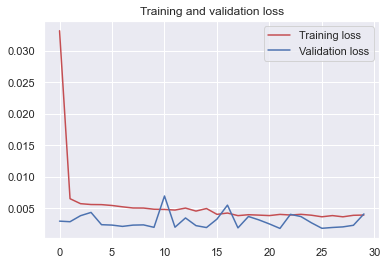

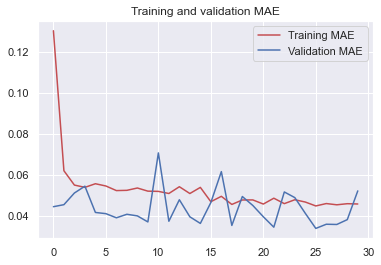

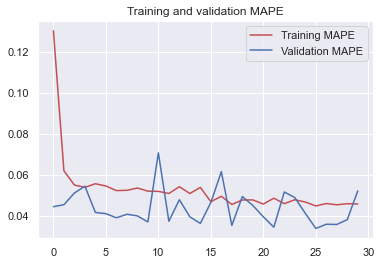

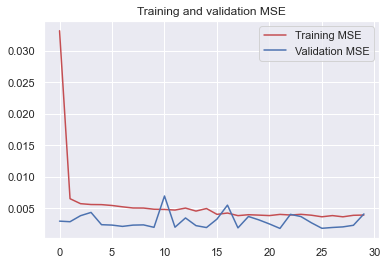

<Figure size 432x288 with 0 Axes>

In [71]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']
mape=history.history['mape']
val_mape=history.history['val_mape']
mse=history.history['mse']
val_mse=history.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [72]:
test_predict = model.predict(X_test)

In [73]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[3391.1948],
       [3366.2998],
       [3320.6184],
       [3319.2058],
       [3278.7292],
       [3276.1716],
       [3326.534 ],
       [3237.526 ],
       [3237.068 ],
       [3173.2131],
       [3160.4597],
       [3149.444 ],
       [3113.4226],
       [3077.1025],
       [3048.4102],
       [3019.5579],
       [3033.6804],
       [3016.2407],
       [3138.0452],
       [3123.7598],
       [3075.8164],
       [3066.347 ],
       [3122.9116],
       [3155.1753],
       [3196.4187],
       [3194.542 ],
       [3234.0068],
       [3169.176 ],
       [3183.142 ],
       [3240.8638],
       [3183.26  ],
       [3213.4688],
       [3221.257 ],
       [3273.1462],
       [3291.746 ],
       [3325.0657],
       [3305.9854],
       [3292.3755],
       [3239.4502],
       [3221.186 ],
       [3306.6382],
       [3270.6174],
       [3303.1577],
       [3365.0193],
       [3344.4917],
       [3355.483 ],
       [3386.4465],
       [3356.5742],
       [3335.2769],
       [3326.674 ],


In [74]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(np.mean(((test_predict1- df_p[training_size:])**2)))
rmse

Close    83.89867
dtype: float64

<ipython-input-75-e48f3cb14095>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict1


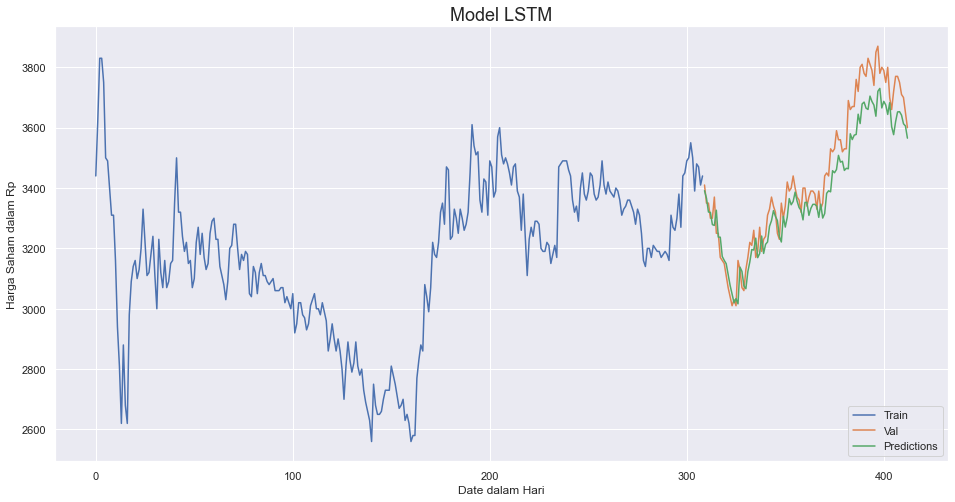

In [75]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict1
plt.figure(figsize=(16,8))
plt.title('Model LSTM', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Train','Val', 'Predictions'], loc='lower right')
plt.show()

# Forecasting dengan RNN

In [76]:
model2 = Sequential()
model2.add(SimpleRNN(145, return_sequences=False, input_shape=(time_step,1)))
model2.add(Dense(65,activation='tanh'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 145)               21315     
                                                                 
 dense_4 (Dense)             (None, 65)                9490      
                                                                 
 dense_5 (Dense)             (None, 1)                 66        
                                                                 
Total params: 30,871
Trainable params: 30,871
Non-trainable params: 0
_________________________________________________________________


In [77]:
history_RNN = model2.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
39/39 [==============================] - 2s 15ms/step - loss: 0.0318 - mae: 0.1302 - mape: 1238437.0000 - mse: 0.0318 - val_loss: 0.0040 - val_mae: 0.0515 - val_mape: 9.0554 - val_mse: 0.0040
Epoch 2/30
39/39 [==============================] - 0s 6ms/step - loss: 0.0053 - mae: 0.0561 - mape: 609451.6250 - mse: 0.0053 - val_loss: 0.0018 - val_mae: 0.0348 - val_mape: 5.7443 - val_mse: 0.0018
Epoch 3/30
39/39 [==============================] - 0s 6ms/step - loss: 0.0045 - mae: 0.0505 - mape: 531439.6250 - mse: 0.0045 - val_loss: 0.0029 - val_mae: 0.0433 - val_mape: 6.3785 - val_mse: 0.0029
Epoch 4/30
39/39 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0458 - mape: 576264.6250 - mse: 0.0040 - val_loss: 0.0018 - val_mae: 0.0338 - val_mape: 5.6483 - val_mse: 0.0018
Epoch 5/30
39/39 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0459 - mape: 542421.7500 - mse: 0.0037 - val_loss: 0.0017 - val_mae: 0.0322 - val_mape: 5.3038 - val_mse: 

<Figure size 432x288 with 0 Axes>

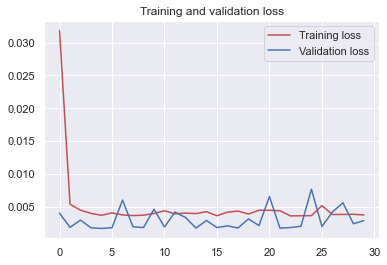

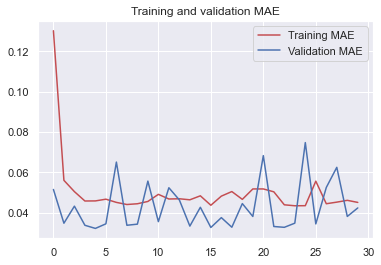

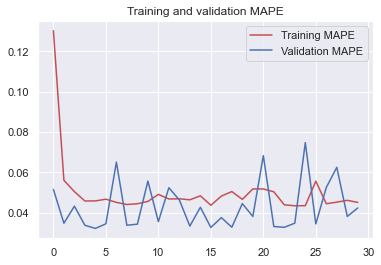

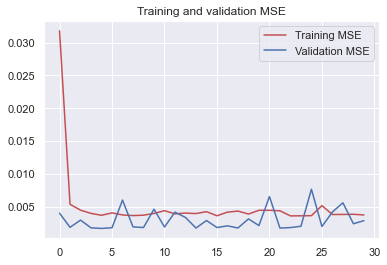

<Figure size 432x288 with 0 Axes>

In [78]:
loss=history_RNN.history['loss']
val_loss=history_RNN.history['val_loss']
mae=history_RNN.history['mae']
val_mae=history_RNN.history['val_mae']
mape=history_RNN.history['mape']
val_mape=history_RNN.history['val_mape']
mse=history_RNN.history['mse']
val_mse=history_RNN.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [79]:
test_predict_RNN = model2.predict(X_test)

In [80]:
test_predict2 = scaler.inverse_transform(test_predict_RNN)
test_predict2

array([[3409.5513],
       [3364.3665],
       [3326.0244],
       [3325.4387],
       [3268.1028],
       [3282.8987],
       [3337.917 ],
       [3218.7683],
       [3253.5996],
       [3142.37  ],
       [3159.2705],
       [3133.1335],
       [3103.3855],
       [3070.3357],
       [3039.946 ],
       [3011.3552],
       [3032.9631],
       [3007.1619],
       [3161.7832],
       [3102.5881],
       [3086.589 ],
       [3062.5295],
       [3120.751 ],
       [3152.4224],
       [3210.8264],
       [3194.5237],
       [3250.4294],
       [3148.8704],
       [3194.692 ],
       [3241.512 ],
       [3167.515 ],
       [3234.1204],
       [3210.0613],
       [3293.0925],
       [3298.6663],
       [3347.9214],
       [3309.7422],
       [3302.2642],
       [3227.741 ],
       [3218.775 ],
       [3322.2463],
       [3259.344 ],
       [3334.4246],
       [3378.7717],
       [3352.424 ],
       [3379.9167],
       [3400.2253],
       [3361.8308],
       [3347.6484],
       [3329.486 ],


In [81]:
#RMSE RNN
rmse_RNN=np.sqrt(np.mean(((test_predict2- df_p[training_size:])**2)))
rmse_RNN

Close    70.028744
dtype: float64

<ipython-input-93-fe03cbcd9349>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict2


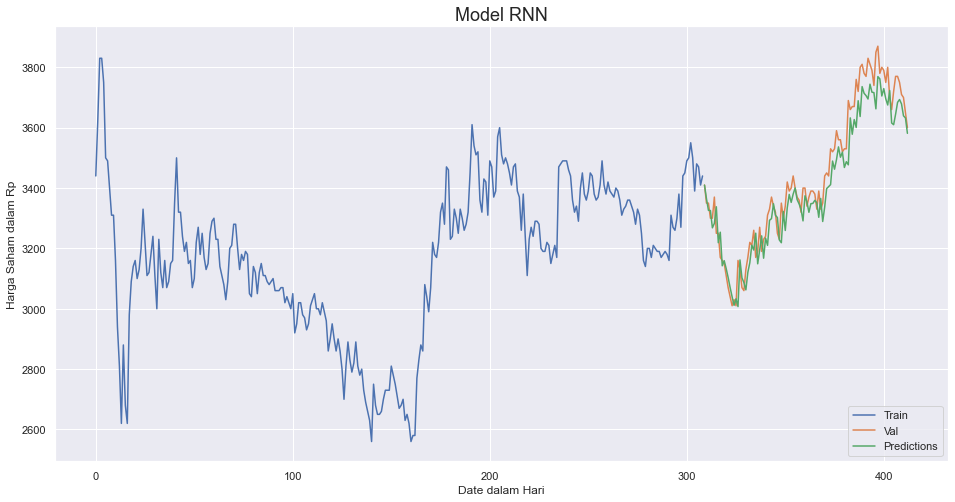

In [93]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict2
plt.figure(figsize=(16,8))
plt.title('Model RNN', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend([ 'Train','Val','Predictions'], loc='lower right')
plt.show()

<ipython-input-92-6422ed7508d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = test_predict1
<ipython-input-92-6422ed7508d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_RNN'] = test_predict2


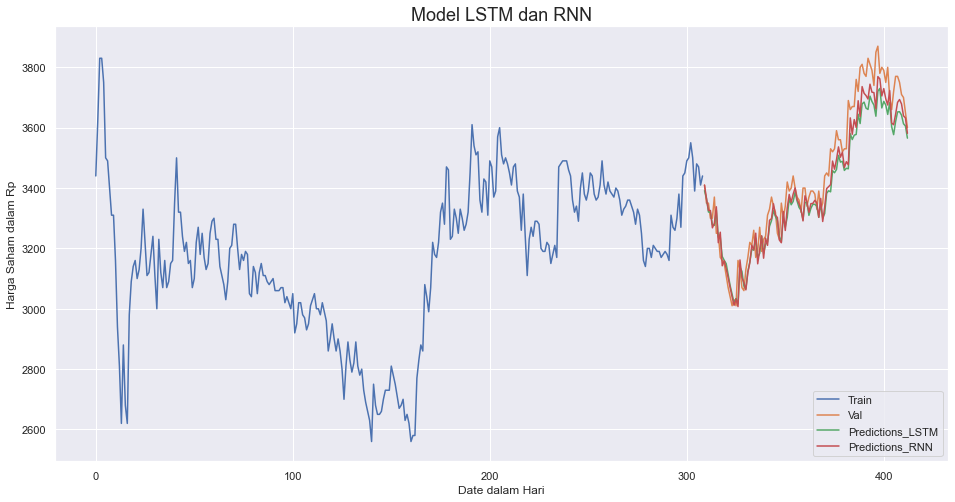

In [92]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions_LSTM'] = test_predict1
valid['Predictions_RNN'] = test_predict2
plt.figure(figsize=(16,8))
plt.title('Model LSTM dan RNN', fontsize=18)
plt.xlabel('Date dalam Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions_LSTM','Predictions_RNN']])
plt.legend([ 'Train','Val','Predictions_LSTM','Predictions_RNN'], loc='lower right')
plt.show()